<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml06_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 농어(Perch) 무게 예측

* 농어의 모든 특성들을 사용한 무게 예측
* KNN Regressor vs Linear Regression 비교
* 다항 회귀
* 규제(Regularization)

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [4]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [5]:
fish = pd.read_csv(file_path)

In [6]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [7]:
perch = fish[fish.Species == 'Perch']   # Perch(농어) 데이터셋 생성

In [9]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


Weight ~ Length + Diagonal + Height + Width

In [22]:
perch.columns[2:]
# X = perch[['Length', 'Diagonal', 'Height', 'Width']].values
X = perch[perch.columns[2:]].values     # 특성(features) 배열

In [23]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [24]:
y = perch['Weight'].values  # 타겟(target) 배열

In [25]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련 셋/테스트 셋 나누기

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
X_train.shape

(42, 4)

In [28]:
X_test.shape

(14, 4)

In [29]:
y_train.shape

(42,)

In [30]:
y_test.shape

(14,)

# 1차항만 고려한 회귀

## KNN

In [31]:
knn = KNeighborsRegressor() # ML Model Create

In [32]:
knn.fit(X_train, y_train)   # model training

KNeighborsRegressor()

In [33]:
train_pred = knn.predict(X_train)   # X_train의 예측값  찾기

In [36]:
train_pred[:5]  # 5개만 출력

array([ 87.6, 123. ,  79.6,  70.6, 723. ])

In [38]:
y_train[:5] # 실제값 5개 출력, (농어의 무게)

array([ 85., 135.,  78.,  70., 700.])

In [39]:
test_pred = knn.predict(X_test)     # 테스트 셋 예측값 계산

In [40]:
test_pred[:5]

array([ 60. ,  79.6, 248. , 122. , 130. ])

In [41]:
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [42]:
print('훈련 셋 MSE:', mean_squared_error(y_train, train_pred))
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 MSE:', mean_squared_error(y_test, test_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 MSE: 2986.5723809523806
훈련 셋 R2: 0.97579760182756
테스트 셋 MSE: 837.3100000000001
테스트 셋 R2: 0.9916579819676246


KNN 모델은 과소적합.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

선형회귀식에서 예측한 값 $\hat{y}$들의 MSE가 최소가 되는 $w_0$ ~ $w_4$를 찾는 과정.

In [43]:
lin_reg = LinearRegression()    # ML Model Create

In [44]:
lin_reg.fit(X_train, y_train)   # ML training

LinearRegression()

In [46]:
lin_reg.coef_       # 기울기 값. 결정계수

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [47]:
lin_reg.intercept_  #

np.float64(-610.0275364260515)

무게 = -610 -40 x Length + 47 x Diagnoal + 67 x Height + 35 x Width

In [48]:
train_pred = lin_reg.predict(X_train)   # 훈련 셋 예측값 계산

In [49]:
test_pred = lin_reg.predict(X_test) # 테스트 셋 예측값 계산

In [50]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9567246116638569
테스트 셋 R2: 0.8790465615990273


Linear Regression은 과대적합.

Linear Regression은 KNN보다 오차가 크다. (성능이 안 좋다.)

# 2차항을 고려한 회귀

## KNN

In [51]:
poly = PolynomialFeatures(include_bias=False)   # 변환기
# degree=2(기본값) : 2차항까지 고려
# interaction_only=False(기본값) : x1^2, ... x4^2, x1 * x2, x1 * x3, ... 모든 2차항들을 고려.
# 만약 interaction_only=True로 설정하면 제곱항들은 무시됨.

In [52]:
scaler = StandardScaler()       # 변환기

In [53]:
knn = KNeighborsRegressor()     # 추정기

In [54]:
pipe = Pipeline(steps=[('poly', poly),
                       ('scaler', scaler),
                       ('knn', knn)])

In [55]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [56]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [57]:
train_pred = pipe.predict(X_train)  # train 예측값 생성

In [58]:
train_pred[:5]

array([ 79.6, 130. ,  79.6,  79.6, 666.2])

In [59]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [60]:
test_pred = pipe.predict(X_test)    # test 예측값 생성

In [61]:
test_pred[:5]

array([ 61. ,  79.6, 248. , 122. , 130. ])

In [62]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [63]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9852536214139073
테스트 셋 R2: 0.9861441832656344


1차항만 고려한 KNN과 비교하면 훈련 셋의 점수가 좋아졌고, 과소적합의 크기도 줄어듦.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
 + w_5 \times x_1^2 + w_6 \times x_1 x_2 + \dots + w_{14} \times w_4^2
$$

선형 회귀식 예측값들의 MSE를 최소로 하는 $w_0$ ~ $w_{14}$를 찾는 것.

In [66]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                       ('scaler', StandardScaler()),
                        ('lin_reg', LinearRegression())])

In [67]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [68]:
# 선형 회귀의 계수들(coefficients)
pipe['lin_reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [69]:
# 선형 회귀의 절편(intercept)
pipe['lin_reg'].intercept_

np.float64(400.833333333325)

In [71]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [72]:
train_pred = pipe.predict(X_train)  # 훈련 셋 예측값

In [74]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [75]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [73]:
test_pred = pipe.predict(X_test)    # 테스트 셋 예측값

In [76]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9920055538341164
테스트 셋 R2: 0.949260960155254


# 규제의 필요성

* 선형 회귀 : Weight ~ Length
* 고차항을 포함하는 선형 회귀 :
    * 1차항 : W ~ L
    * 2차항 : W ~ L + L^2
    * 5차항 : W ~ L + L^2 + L^3 + L^4 + L^5
    * 50차항 : W ~ L + ... + L^50

In [83]:
X = perch[['Length']].values    # 특성(feautres) 배열
y = perch['Weight'].values      # 타겟(target) 배열

In [85]:
# 훈련/테스트 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## degree=1, 1차항

In [86]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [87]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [88]:
pipe['reg'].coef_

array([340.55381311])

In [89]:
pipe['reg'].intercept_

np.float64(400.83333333333337)

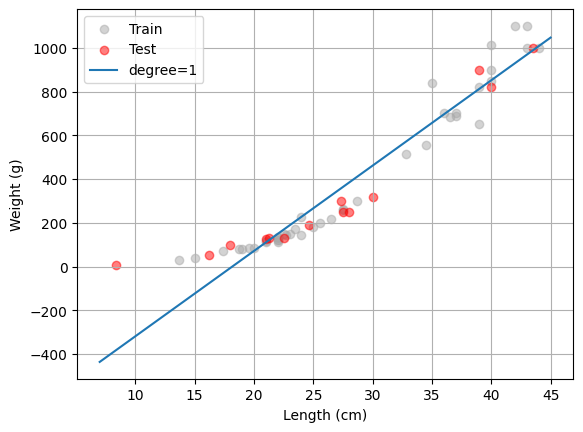

In [101]:
# 훈련 셋 산점도(무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='DarkGray')
# 테스트 셋 산점도(무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='Red')
# 선형 회귀 직선 선그래프
x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)   # y = w0 + w1 * x
plt.plot(x_vals, y_vals, label='degree=1')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

## degree=2, 2차항

In [102]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [103]:
pipe.fit(X_train, y_train)  # training

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [104]:
pipe['reg'].coef_

array([-188.16429447,  532.30423546])

In [105]:
pipe['reg'].intercept_

np.float64(400.83333333333326)

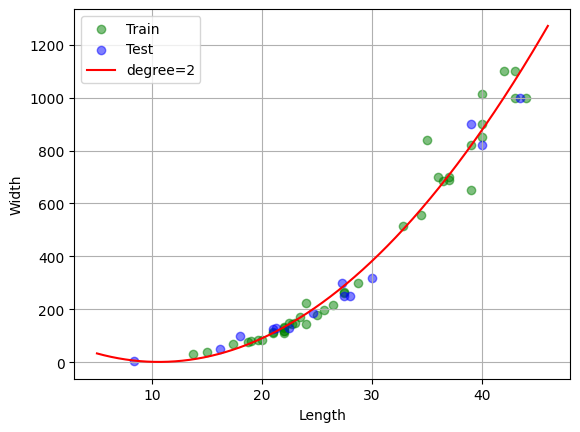

In [118]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train', color='green')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test', color='blue')
# 선형회귀 2차항 선그래프
x_value = np.arange(5, 46, 0.001).reshape((-1, 1))
y_value = pipe.predict(x_value)
plt.plot(x_value, y_value, label='degree=2', color='red')

plt.legend()
plt.grid()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## degree=5, 5차항

In [119]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [120]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [121]:
pipe['reg'].coef_

array([ 1090.51349849, -4377.12096334,  5960.80924384, -2038.47216236,
        -298.04297802])

In [122]:
pipe['reg'].intercept_

np.float64(400.8333333333347)

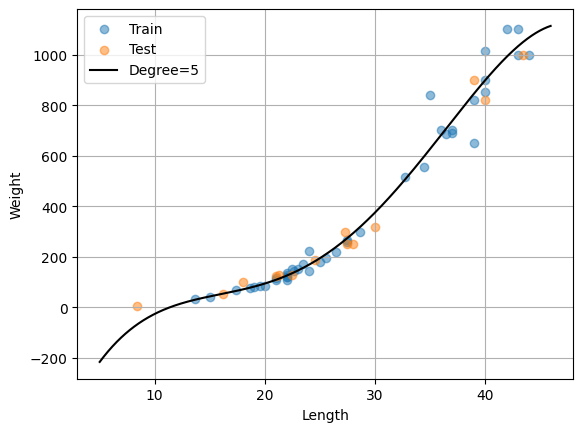

In [128]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# 선형회귀 5차항 선그래프
x_values = np.arange(5, 46, 0.001).reshape((-1, 1))
y_values = pipe.predict(x_values)
plt.plot(x_values, y_values, label='Degree=5', color='black')

plt.grid()
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.show()

## degree=50, 50차항

In [130]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [131]:
pipe.fit(X_train, y_train)      # training

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [132]:
pipe['reg'].coef_

array([-1.06655732e+10,  1.31607835e+11, -7.23161507e+11,  2.21914500e+12,
       -3.82903989e+12,  2.83355131e+12,  1.34283568e+12, -2.96056487e+12,
       -1.15588476e+12,  2.47206303e+12,  2.08521405e+12, -1.12369432e+12,
       -2.75528228e+12, -1.19478485e+12,  1.52303149e+12,  2.66920812e+12,
        1.41672749e+12, -9.47446537e+11, -2.50374325e+12, -2.21496901e+12,
       -4.41802170e+11,  1.56357602e+12,  2.57516018e+12,  2.08702650e+12,
        4.67713722e+11, -1.36681656e+12, -2.48471888e+12, -2.38414097e+12,
       -1.16743693e+12,  5.69154142e+11,  2.04400475e+12,  2.63025744e+12,
        2.09946051e+12,  6.87519539e+11, -1.02047640e+12, -2.32799351e+12,
       -2.69616960e+12, -1.95101562e+12, -3.62133469e+11,  1.44020668e+12,
        2.68424495e+12,  2.75434519e+12,  1.48200526e+12, -6.79292434e+11,
       -2.68516349e+12, -3.22616369e+12, -1.39723093e+12,  2.26817999e+12,
        4.41059579e+12, -2.84704294e+12])

In [133]:
pipe['reg'].intercept_

np.float64(400.8355034612611)

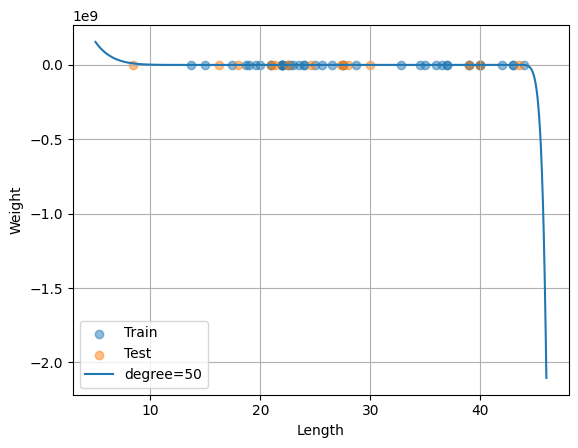

In [136]:
# 훈련 셋 산점도 (무게 ~ 길이)
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
# 테스트 셋 산점도 (무게 ~ 길이)
plt.scatter(X_test, y_test, alpha=0.5, label='Test')
# 선형회귀 50차항 선그래프
x_vals = np.arange(5, 46, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)
plt.plot(x_vals, y_vals, label='degree=50')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()